# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID', copy=True)

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [23]:
# Checking the number of mice.
unique_mice_series = pd.unique(combined_df['Mouse ID'])
len(unique_mice_series)

249

In [24]:
type(unique_mice_series)

numpy.ndarray

In [25]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
unique_mice_series

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'g989', 'z314', 'o848', 'v719', 'q597',
      

Citation

1. Removing a row or column from a DataFrame
    - Name: pandas.DataFrame.drop()
    - URL: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [26]:
#Listing of Duplicate Data


## initializes list of duplicate data list. Necessary for duplicate data df.
duplicate_data_list = []
###data slices list
data_slices_list = []
## initialize loop from 0 to lenth of unique mice series to loop over all unique data
for mouse_index in range(len(unique_mice_series)):
    ### slice data for each unique mouse separately
    mouse_slice_df = combined_df.loc[combined_df['Mouse ID'] == unique_mice_series[mouse_index], :]
    
    ### Now sort mouse_slice_df by timepoints
    mouse_slice_df = mouse_slice_df.sort_values(by=['Mouse ID', 'Timepoint'], ignore_index=True)
    
    
    length = len(mouse_slice_df['Mouse ID'])
    index = 0
    add_flag = True
    while index < length:
        current_value = mouse_slice_df.iat[index, 1]
        next_value = 0
        if (index + 1) < length:
            next_value = mouse_slice_df.iat[index + 1, 1]
            if current_value == next_value:
                duplicate_data_list.append(mouse_slice_df.iloc[index +1, :])
                mouse_slice_df.drop(index=index +1, inplace=True)
                length -= 1
                index +=1
                add_flag = False
            else:
                index+=1
                pass
        else: 
            index+=1
            pass
    if(add_flag is True):       
        data_slices_list.append(mouse_slice_df)
    else:
        pass
print(len(data_slices_list))
type(duplicate_data_list[0])

248


pandas.core.series.Series

In [27]:
# transposing the data
transposed_duplicate_data_list = []
for duplicate_series in duplicate_data_list:
    duplicate_df = duplicate_series.to_frame()
    duplicate_df = duplicate_df.T
    transposed_duplicate_data_list.append(duplicate_df)
    

In [28]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data_df =pd.concat(transposed_duplicate_data_list, axis=0)
duplicate_data_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,g989,0,45.0,0,Propriva,Female,21,26
3,g989,5,47.570392,0,Propriva,Female,21,26
5,g989,10,49.880528,0,Propriva,Female,21,26
7,g989,15,53.44202,0,Propriva,Female,21,26
9,g989,20,54.65765,1,Propriva,Female,21,26


In [31]:
# Remove Mouse with compromised data
cleaned_data_df = pd.concat(data_slices_list, axis=0, ignore_index=True)
cleaned_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


### Citation

1. Using Series.to_frame(): Series conversion to Dataframe
    - Url: https://pandas.pydata.org/docs/reference/api/pandas.Series.to_frame.html#pandas.Series.to_frame  
2. Transposing data from long format to wide format
    - pandas.DataFrame.T property (stores the transpose within the Dataframe instance)
    - Url: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.T.html

In [35]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_data_df['Mouse ID'].unique())

248

## Summary Statistics

In [44]:
mean_df= cleaned_data_df.loc[:,['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').mean()
mean_df = mean_df.rename({"Tumor Volume (mm3)":"Mean Tumor Volume"})
median_df = cleaned_data_df.loc[:,['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').median()
median_df = median_df.rename({"Tumor Volume (mm3)":"Median Tumor Volume"})
var_df = cleaned_data_df.loc[:,['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').var()
var_df = var_df.rename({"Tumor Volume (mm3)":"Tumor Volume Variance"})
std_df = cleaned_data_df.loc[:,['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').std()
std_df = std_df.rename({"Tumor Volume (mm3)":"Tumor Volume Std. Dev."})
sem_df = cleaned_data_df.loc[:,['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').sem()
sem_df = sem_df.rename({"Tumor Volume (mm3)":"Tumor Volume Std. Err."})


In [46]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
pd.concat([mean_df, median_df, var_df, std_df, sem_df], axis=1)

,Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [49]:

# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

cleaned_data_df.loc[:,['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [56]:

drug_by_timepoint_count_df = cleaned_data_df.loc[:,['Drug Regimen','Timepoint']].groupby('Drug Regimen').count()
drug_by_timepoint_count_df.sort_values(by=['Timepoint'], ascending=False, inplace=True)
drug_by_timepoint_count_df

,Timepoint
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


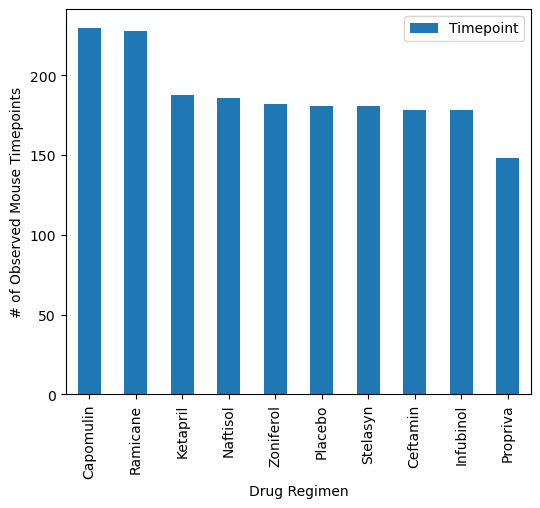

In [61]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_by_timepoint_count_df.plot(kind='bar', 
                                figsize=(6,5), xlabel= 'Drug Regimen', 
                                ylabel= '# of Observed Mouse Timepoints')
plt.show()

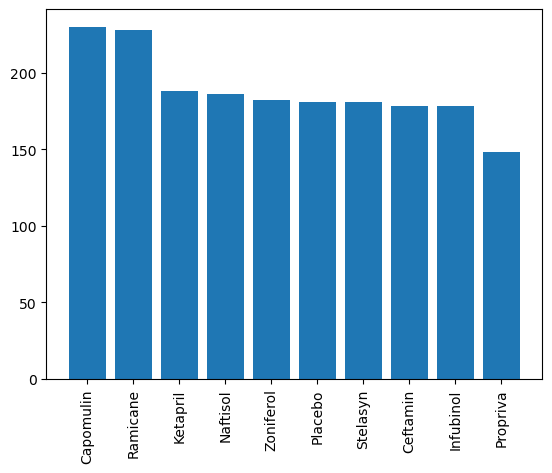

In [65]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(drug_by_timepoint_count_df['Timepoint']))
plt.bar(x_axis, drug_by_timepoint_count_df['Timepoint'], align='center')
# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_by_timepoint_count_df.index, rotation='vertical')
plt.show()

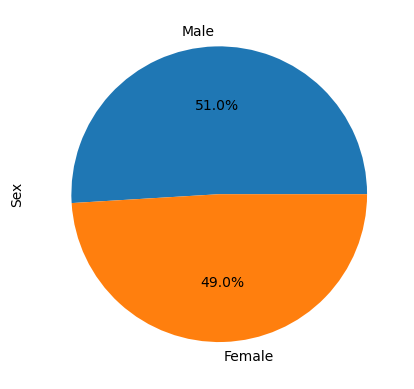

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


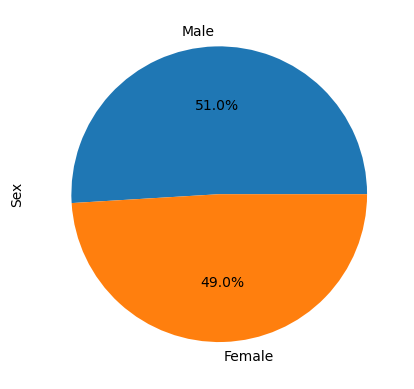

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


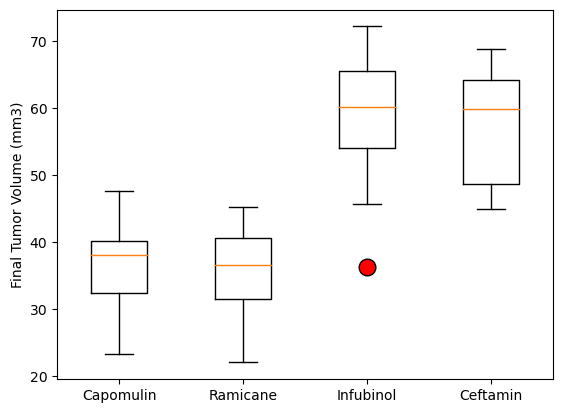

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

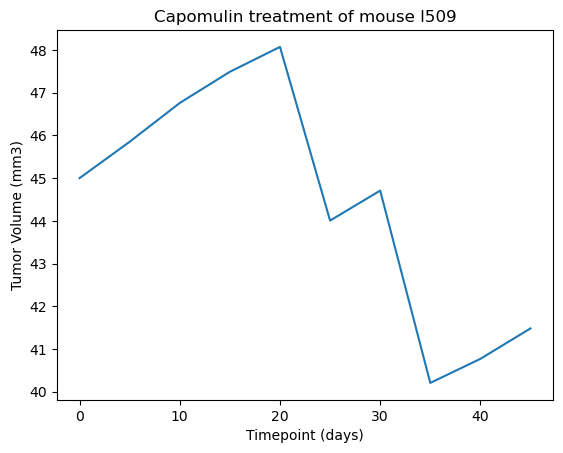

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


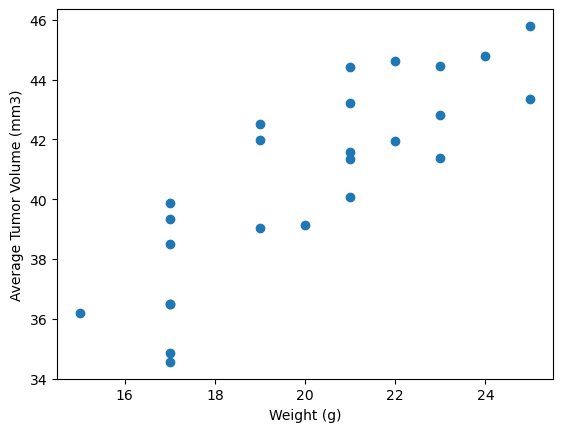

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


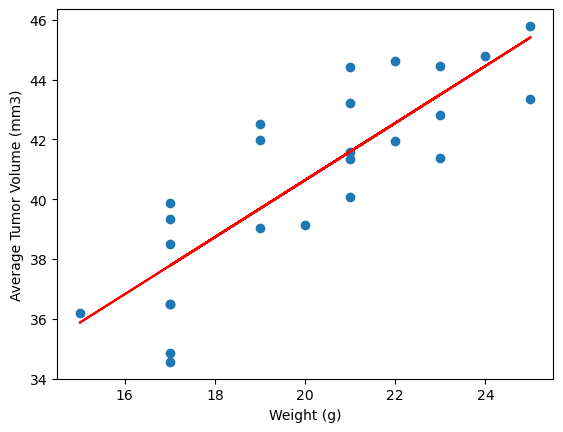

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
